# Готовим данные для домашки

In [4]:
import pandas as pd
from datetime import datetime

air_df = pd.read_csv('./data/air_quality.tar.gz', compression='gzip', sep=';', encoding='utf8')
air_df = air_df[air_df.iloc[:,0].notnull()]

# формируем 
air_df['ts'] = (air_df.iloc[:,0]+ ' ' + air_df.iloc[:,1]).map(
    lambda x: datetime.strptime(x.replace('.',':'), "%d/%m/%Y %H:%M:%S")
)

air_df.head(5)

,air_quality.csv,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,ts
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-03-10 18:00:00
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-03-10 19:00:00
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-03-10 20:00:00
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-03-10 21:00:00
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-03-10 22:00:00


# Визуализация данных с помощью matplotlib 

## 1. Чтение текстовых файлов, файловые дескрипторы

### 1.1

**Простая задача** Выберите любой показатель загрязнённости воздуха (кроме NOx(GT), его мы использовали в туториале) и постройте график по 30 последним доступным наблюдениям.

*Результат выполнения*

Должен получиться такой же график, как для NOx(GT) (из второго урока данного модуля).
![title](https://248006.selcdn.ru/public/Data-science-2/img/PearsonFig.jpg)

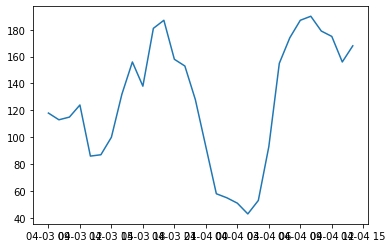

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

register_matplotlib_converters()
TAIL=-30

fig, subplot = plt.subplots()
x_ticks = air_df['ts'].values[TAIL:]
y_ticks = air_df['NO2(GT)'].values[TAIL:]
subplot.plot(x_ticks, y_ticks)
plt.show()

### 1.2

**Задание среднего уровня** Постройте scatter plot между выбранным вами показателем и температурой (содержится в столбце `air_df['T]`).

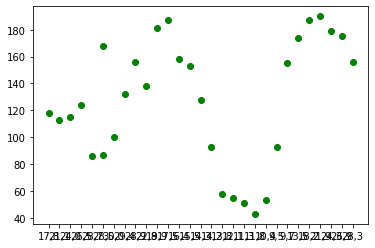

In [19]:
#%matplotlib inline
#register_matplotlib_converters()

TAIL=-30
fig, subplot = plt.subplots()
x_values = air_df['T'].values[TAIL:TAIL:]
y_values = air_df['NO2(GT)'].values[TAIL:]
subplot.scatter(
    x=x_values, y=y_values, 
    marker='o', c='g'
)

### 1.3

**Задание высокого уровня** Аналогично тому, как мы строили два графика рядом, отобразите на одном полотне следующие 4 графика:
<pre>
['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)'].
</pre>
По каждому показателю учитывайте только последние 30 наблюдений. Значения оси X используйте из столбца T.

*Ожидаемый результат*

![title](https://248006.selcdn.ru/public/Data-science-2/img/four_pack.png)

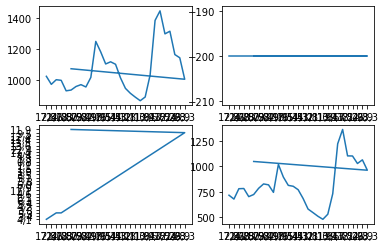

In [32]:
# ниже поразвлекалась сделать без дублирования кода.

#%matplotlib inline
#register_matplotlib_converters()

TAIL=-30

fig = plt.figure()

subplot1 = fig.add_subplot(221)
subplot1.plot(
    air_df['T'].values[TAIL:], 
    air_df['PT08.S1(CO)'].values[TAIL:]
)

subplot2 = fig.add_subplot(222)
subplot2.plot(
    air_df['T'].values[TAIL:], 
    air_df['NMHC(GT)'].values[TAIL:]
)

subplot3 = fig.add_subplot(223)
subplot3.plot(
    air_df['T'].values[TAIL:], 
    air_df['C6H6(GT)'].values[TAIL:]
)

subplot4 = fig.add_subplot(224)
subplot4.plot(
    air_df['T'].values[TAIL:], 
    air_df['PT08.S2(NMHC)'].values[TAIL:]
)

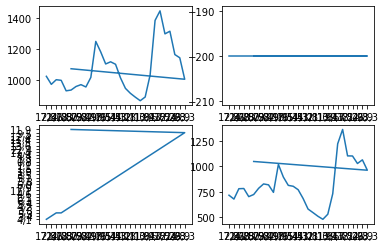

In [39]:
# Можно было ещё вынести это в функцию, но получается или сильно однобоко, или много параметров 
# (и датафрейм, и лист параметров по x, и желательно по y, и сколько элементов взять, сначала или с конца).
# В общем не имеет смысла вне конкретной постановки задачи. 
# Но четыре раза повторять код и не впихнуть это в цикл было бы совсем некрасиво =)

#%matplotlib inline
#register_matplotlib_converters()

TAIL=-30

fig = plt.figure()

#list_index = ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NO2(GT)']
list_index = ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)']
rows = int(np.ceil(np.sqrt(len(list_index))))
columns = int(np.floor(np.sqrt(len(list_index))))

i = 1
for element in list_index:
    fig.add_subplot(100 * rows + 10 * columns + i).plot(
        air_df['T'].values[TAIL:], 
        air_df[element].values[TAIL:]
    )
    i += 1